In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")

# Exploratory data
| Column| Definition|
|------|----|
| baseline value| The baseline fetal heart rate.|
| accelerations| The number of accelerations per second.|
| fetal_movement| The number of fetal movements per second.|
| uterine_contractions| The number of uterine contractions per second.|
| light_decelerations| The number of light decelerations per second.|
| severe_decelerations| The number of severe decelerations per second.|
| prolongued_decelerations| The number of prolonged decelerations per second.|
| abnormal_short_term_variability| Percentage of time with abnormal short-term variability.|
| mean_value_of_short_term_variability| Mean value of short-term variability.|
| percentage_of_time_with_abnormal_long_term_variability| Percentage of time with abnormal long-term variability.|
| mean_value_of_long_term_variability| Mean value of long-term variability.|
| histogram_width| Width of the fetal heart rate histogram.|
| histogram_min| Minimum value in the fetal heart rate histogram.|
| histogram_max| Maximum value in the fetal heart rate histogram.|
| histogram_number_of_peaks| Number of peaks in the fetal heart rate histogram.|
| histogram_number_of_zeroes| Number of zeroes in the fetal heart rate histogram.|
| histogram_mode| Mode of the fetal heart rate histogram.|
| histogram_mean| Mean of the fetal heart rate histogram.|
| histogram_median| Median of the fetal heart rate histogram.|
| histogram_variance| Variance of the fetal heart rate histogram.|
| histogram_tendency| Tendency of the fetal heart rate histogram.|
| fetal_health| The target variable, indicating the fetal health status.|


# load data and clean

In [3]:
df=pd.read_csv("fetal_health.csv")

# preprocessing data

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
print("Shape of data:", df.shape)
print("Number of duplicate rows:", df.duplicated().sum())
print("Number of missing values:", df.isnull().sum())

Shape of data: (2126, 22)
Number of duplicate rows: 13
Number of missing values: baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of

# reasons why the data might be missing:

1. **Medical context**: The features seem be extracted from cardiotocography (CTG) signals, which measure fetal heart rate and uterine contractions.
2. **Technical issues**: Some columns might be missing due to technical problems during data collection, such as:
	* Sensor malfunctions or misplacement.
	* Data transmission errors or losses.
	* Incomplete or corrupted recordings.
3. **Data preprocessing**: The data might be missing due to preprocessing steps, such as:
	* Filtering or cleaning the data to remove noise or artifacts.
	* Feature extraction methods that didn't produce values for certain columns.
	* Data normalization or transformation techniques that didn't preserve all the original values.
4. **Clinical decisions**: In some cases, the data might be missing due to clinical decisions, such as:
	* The healthcare provider might not have recorded certain features or values.
	* The data was not deemed relevant or necessary for the specific case.
5. **Data quality**: The data might be missing due to quality issues, such as:
	* Incomplete or inconsistent recordings.
	* Incorrect or missing annotations.
	* Data entry errors.

To further investigate the missing data, I would recommend:

1. Reviewing the data collection process and technical setup.
2. Consulting with the healthcare providers and clinicians involved in the data collection.
3. Analyzing the data distribution and patterns to identify potential correlations or relationships between the missing values and other features.
4. Implementing data imputation techniques, such as mean or median imputation, or more advanced methods like k-nearest neighbors (KNN) or decision trees, to fill in the missing values.



In [ ]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# visualisation data

In [ ]:
import cufflinks as cf
import plotly.express as px

pie_data = df['fetal_health'].value_counts()

# Map the numeric labels to their corresponding text labels
labels = {1.0: 'Normal', 2.0: 'Suspect', 3.0: 'Pathological'}
pie_data.index = pie_data.index.map(labels)

# Create a pie chart
fig = px.pie(names=pie_data.index, values=pie_data.values, title='Fetal Health Distribution')
fig.update_layout(width=600, height=400)

# Show the chart
fig.show()


In [ ]:
import pandas as pd
import cufflinks as cf
import plotly.offline as py
import plotly.graph_objs as go


# Calculate correlation matrix
corr_matrix = df.corr()

# Create a heatmap
heatmap = go.Heatmap(z=corr_matrix.values,
                     x=corr_matrix.columns,
                     y=corr_matrix.columns)

layout = go.Layout(
    title='Correlation Matrix',
    width=1200,  # Specify the width of the figure
    height=900  # Specify the height of the figure
)

fig = go.Figure(data=[heatmap], layout=layout)

# Plot the heatmap
py.iplot(fig)


In [ ]:
import cufflinks as cf
import plotly.offline as py
import plotly.graph_objs as go

# Sort feature importance
feature_importance = corr_matrix['fetal_health'].abs().sort_values(ascending=False)

# Create a horizontal bar chart
bar_chart = feature_importance.iplot(kind='barh',
                                     xTitle='Feature Importance',
                                     yTitle='Features',
                                     title='Feature Importance',
                                     colors=['blue'],
                                     asFigure=True)

# Set layout parameters
layout = go.Layout(
    margin=dict(l=150),  # Adjust left margin for longer feature names
)

bar_chart['layout'].update(layout)

# Plot the bar chart
py.iplot(bar_chart)


In [ ]:
df.corr()["fetal_health"].abs().sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.486752
abnormal_short_term_variability                           0.469671
percentage_of_time_with_abnormal_long_term_variability    0.421634
accelerations                                             0.363947
histogram_mode                                            0.253612
histogram_mean                                            0.230243
mean_value_of_long_term_variability                       0.225685
histogram_median                                          0.208334
histogram_variance                                        0.208171
uterine_contractions                                      0.205117
baseline value                                            0.146077
histogram_tendency                                        0.135573
severe_decelerations                                      0.132408
mean_value_of_short_term_variability                      0.10

**Histogram plot**

In [ ]:
import plotly.express as px

# assume 'df' is your Pandas DataFrame

fig = px.histogram(df, x="histogram_mean", title="Histogram of Mean Fetal Heart Rate",color='fetal_health')
fig.show()

**Scatter plots And Bubble plots** 

In [ ]:
import plotly.express as px
import pandas as pd

fig = px.scatter(df, x='prolongued_decelerations', 
                 y='accelerations', 
                 size='fetal_movement', 
                 color='fetal_health')

fig.show()

In [ ]:
import plotly.express as px
import pandas as pd



fig = px.scatter(df, x='mean_value_of_short_term_variability', 
                 y='mean_value_of_long_term_variability', 
                 size='fetal_movement', 
                 color='fetal_health')

fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(df, x='fetal_movement', y='mean_value_of_short_term_variability', 
                 color='fetal_health', color_discrete_map={'Normal': 'green', 'Suspect': 'orange', 'Pathological':'red'},
                 size_max=100, title='Relationship between Fetal Movement, Heart Rate Variability, and Health Status')

fig.update_layout(xaxis_title='Fetal Movement', yaxis_title='Mean Value of Short Term Variability (Proxy for Heart Rate)')

fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(df, x="prolongued_decelerations", y="fetal_health", 
                 title="Relationship between Prolongued Decelerations and Fetal Health")
fig.show()

**Box plots**

In [ ]:
import plotly.express as px

fig = px.box(df, x="fetal_health", y= "abnormal_short_term_variability")
fig.show()

**Area plots**

In [ ]:
import plotly.express as px
import cufflinks as cf

# assume 'df' is your Pandas DataFrame

fig = px.area(df, x='baseline value', y='abnormal_short_term_variability', 
              color='fetal_health', title='Fetal Heart Rate and Variability')

fig.show()


# Split Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop('fetal_health', axis=1)  # assuming 'fetal_health' is your target variable
y = df['fetal_health']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Logistic Regression classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
log_reg = LogisticRegression()

# Train the classifier
log_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = log_reg.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8685446009389671


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.90      0.97      0.93       341
         2.0       0.73      0.35      0.47        54
         3.0       0.79      0.82      0.81        28

    accuracy                           0.88       423
   macro avg       0.81      0.71      0.74       423
weighted avg       0.87      0.88      0.86       423



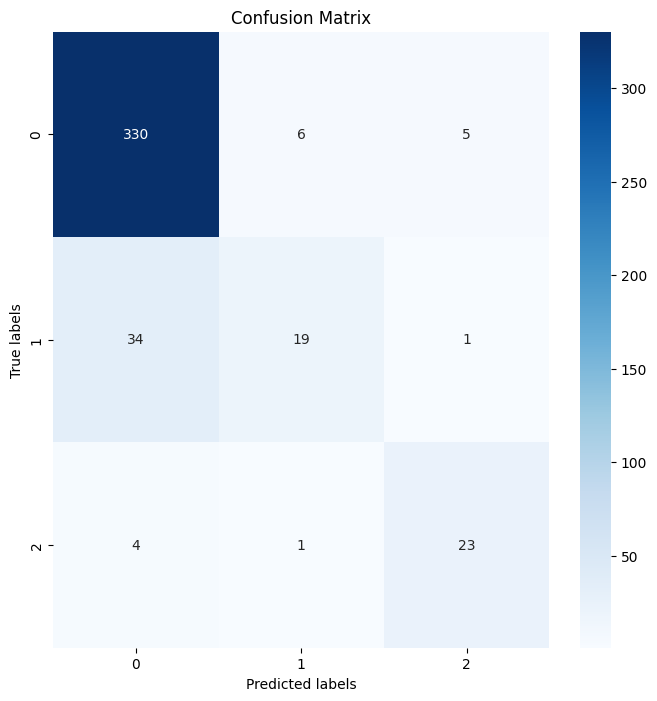

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")

# Add title and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

# Show the plot
plt.show()

# Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9460093896713615


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       341
         2.0       0.91      0.80      0.85        54
         3.0       1.00      1.00      1.00        28

    accuracy                           0.96       423
   macro avg       0.96      0.93      0.94       423
weighted avg       0.96      0.96      0.96       423



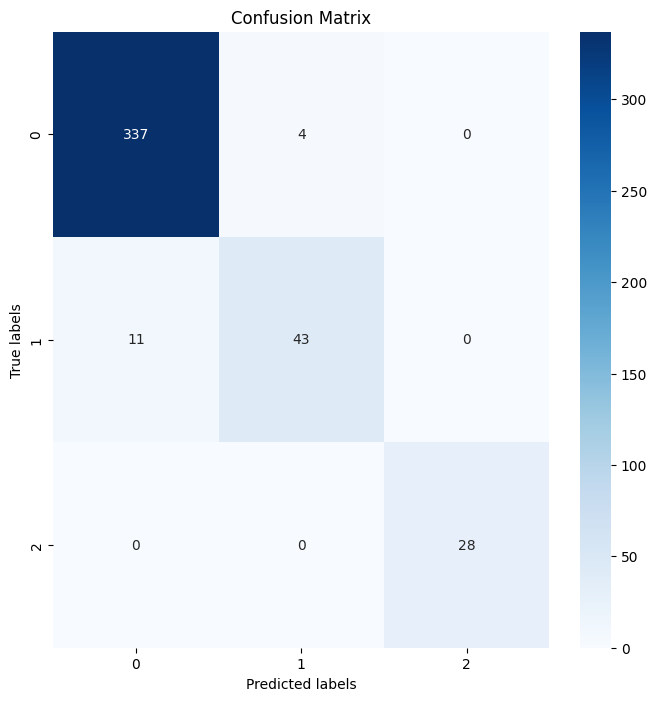

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")

# Add title and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

# Show the plot
plt.show()

# GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


param_grid = {
    'n_estimators': [100, 200, 300],
   'max_depth': [None, 5, 10],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best score: 0.9396449704142013


In [ ]:
best_grid_search = grid_search.best_params_
best_grid_search = RandomForestClassifier(**best_grid_search)
best_grid_search.fit(X_train, y_train)
y_pred = best_grid_search.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         1.0       0.98      0.99      0.98       341
         2.0       0.94      0.85      0.89        54
         3.0       1.00      1.00      1.00        28

    accuracy                           0.97       423
   macro avg       0.97      0.95      0.96       423
weighted avg       0.97      0.97      0.97       423



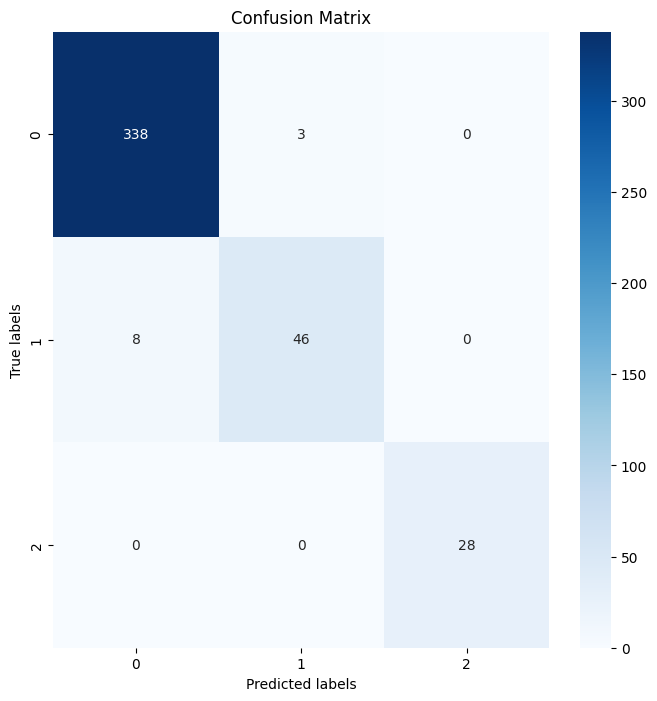

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")

# Add title and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

# Show the plot
plt.show()

# KNN  

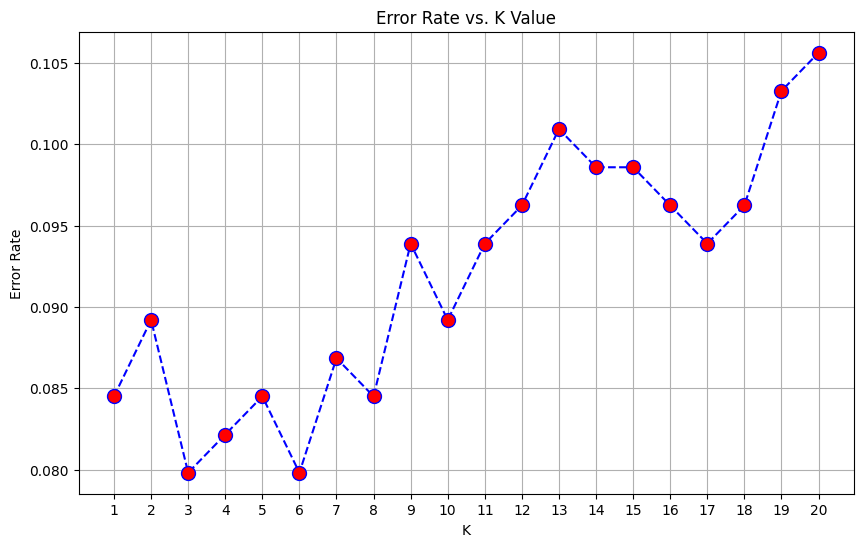

Best value of k: 3


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Finding the best k value by testing 
error_rate = []
for k in range(1, 21):  # Testing k from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    error_rate.append(np.mean(y_pred != y_test))

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()


# Choosing the best k value with the lowest error rate
best_k = np.argmin(error_rate) + 1
print(f"Best value of k: {best_k}")

Classification Report:
              precision    recall  f1-score   support

         1.0       0.93      0.96      0.95       341
         2.0       0.70      0.56      0.62        54
         3.0       0.89      0.86      0.87        28

    accuracy                           0.90       423
   macro avg       0.84      0.79      0.81       423
weighted avg       0.90      0.90      0.90       423



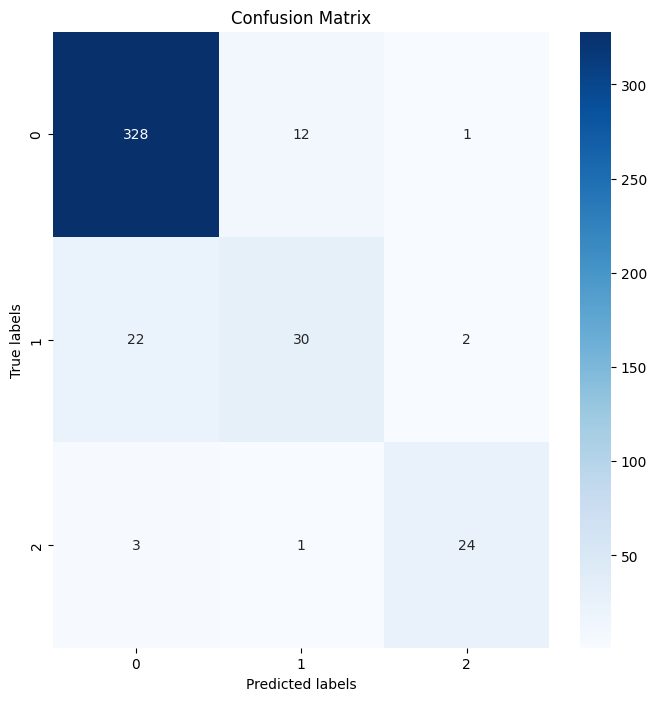

In [ ]:
# Train KNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = knn_classifier.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))


plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")

# Add title and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

# Show the plot
plt.show()


# Pipeline

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, 
np.random.seed(0)

In [ ]:
#pipelines of models( it is short was to fit and pred)
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.855030 
Decision Tree: 0.915385 
RandomForest: 0.937278 
SVC: 0.852071 


In [ ]:
# Generate confusion matrices for each pipeline
for i, pipe in enumerate(pipelines):
    y_pred = pipe.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix for %s:" % pipe_dict[i])
    print(cm)
    print("")

Confusion Matrix for Logistic Regression:
[[330   6   5]
 [ 34  19   1]
 [  4   1  23]]

Confusion Matrix for Decision Tree:
[[328  10   3]
 [ 15  38   1]
 [  0   0  28]]

Confusion Matrix for RandomForest:
[[338   3   0]
 [ 11  43   0]
 [  0   0  28]]

Confusion Matrix for SVC:
[[332   8   1]
 [ 34  20   0]
 [  1   3  24]]



In [ ]:
import numpy as np

# Example test data (replace these values with your actual test data)
test_data = np.array([
   [135,	0.02,	0,	0.003,	0	,0,	0	,64	,0.6,	0,	10.2,	41,	119	,160,	3,	0	,147,	141	,143,	7	,0	],#1
   [128	,0	,0.002,	0.007	,0.005	,0	,0.002	,65,	2.6,	0	,0	,129,	63	,192	,6	,0	,103,	92	,114	,28	,0	],#3
   [159,	0	,0	,0.009,	0	,0,	0	,66	,0.4	,16,	7.2,	23	,147	,170	,0,	0,	165	,164	,166	,0,	1] #2
 ])

# Assuming X_test is your feature matrix for testing
X_me = test_data

class_label = {1:"Normal",
               2:"Suspect", 
               3:"Pathological"
}

models = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc,best_grid_search]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "Support Vector Machine","grid_search"]

for model, name in zip(models, model_names):
    pred = model.predict(X_me)
    decoded_labels = [class_label[label] for label in pred]
    print(f"{name}: {pred} {decoded_labels}")

Logistic Regression: [1. 3. 1.] ['Normal', 'Pathological', 'Normal']
Decision Tree: [1. 3. 2.] ['Normal', 'Pathological', 'Suspect']
Random Forest: [1. 3. 2.] ['Normal', 'Pathological', 'Suspect']
Support Vector Machine: [1. 3. 2.] ['Normal', 'Pathological', 'Suspect']
grid_search: [1. 3. 2.] ['Normal', 'Pathological', 'Suspect']


# save model


In [ ]:
import joblib

joblib.dump(pipeline_rf, 'pipeline_rf.pkl')


['pipeline_rf.pkl']

# load model

In [ ]:
import pickle

# Save the model to a file
with open('pipeline_rf.pkl', 'wb') as f:
    pickle.dump(pipeline_rf, f)


In [ ]:
import numpy as np

# Example test data (replace these values with your actual test data)
test_data = np.array([
   [135,	0.02,	0,	0.003,	0	,0,	0	,64	,0.6,	0,	10.2,	41,	119	,160,	3,	0	,147,	141	,143,	7	,0	],#1
   [128	,0	,0.002,	0.007	,0.005	,0	,0.002	,65,	2.6,	0	,0	,129,	63	,192	,6	,0	,103,	92	,114	,28	,0	],#3
   [159,	0	,0	,0.009,	0	,0,	0	,66	,0.4	,16,	7.2,	23	,147	,170	,0,	0,	165	,164	,166	,0,	1] #2
 ])
X_me = test_data


In [ ]:
class_label = {1:"Normal",
               2:"Suspect", 
               3:"Pathological"
}

# Assuming log_reg is your trained logistic regression model
predicted_labels = pipeline_rf.predict(X_me)

# Assuming le is your LabelEncoder object
decoded_labels = [class_label[label] for label in predicted_labels]
print(predicted_labels)
print(decoded_labels)

[1. 3. 2.]
['Normal', 'Pathological', 'Suspect']
